In [1]:
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import PIL.Image as Image

### vs numpy

In [2]:
#创建基础张量
tensor_eye = torch.eye(4)
tensor_zeros = torch.zeros(4,4)
tensor_ones = torch.ones(4,4)
tensor_define = torch.tensor([1,2,3,4])
print tensor_eye
print tensor_zeros
print tensor_ones
print tensor_define

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([1, 2, 3, 4])


In [3]:
# 规则式创建张量
tensor_linear = torch.linspace(1,10,10)
tensor_arange = torch.arange(1,10,1)
tensor_log = torch.logspace(0,1,10)
print tensor_linear
print tensor_arange
print tensor_log

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([ 1.0000,  1.2915,  1.6681,  2.1544,  2.7826,  3.5938,  4.6416,  5.9948,
         7.7426, 10.0000])


In [4]:
# 概率分布创建张量
tensor_uniform = torch.rand(3,3)
tensor_normal = torch.randn(3,3)
tensor_permutation = torch.randperm(5)
print tensor_uniform
print tensor_normal
print tensor_permutation

tensor([[0.9679, 0.7034, 0.9420],
        [0.2139, 0.0265, 0.3008],
        [0.0775, 0.7678, 0.0030]])
tensor([[ 3.5473e-04, -9.5802e-01, -8.0176e-01],
        [-5.8125e-01, -1.1009e-01,  3.0039e-01],
        [-5.2941e-01,  5.4935e-01, -1.0792e-01]])
tensor([1, 0, 4, 2, 3])


In [5]:
# 索引&切片
tensor_org = torch.rand(4,4)
#连接
tensor_cat = torch.cat((tensor_org, tensor_org), 0)
print tensor_org
print tensor_cat
#切片
tensor_chunk = torch.chunk(tensor_cat, 2, 0)

tensor([[0.2939, 0.6731, 0.2775, 0.8909],
        [0.1014, 0.8820, 0.2379, 0.5579],
        [0.1829, 0.6923, 0.9489, 0.7484],
        [0.7939, 0.7100, 0.8896, 0.7100]])
tensor([[0.2939, 0.6731, 0.2775, 0.8909],
        [0.1014, 0.8820, 0.2379, 0.5579],
        [0.1829, 0.6923, 0.9489, 0.7484],
        [0.7939, 0.7100, 0.8896, 0.7100],
        [0.2939, 0.6731, 0.2775, 0.8909],
        [0.1014, 0.8820, 0.2379, 0.5579],
        [0.1829, 0.6923, 0.9489, 0.7484],
        [0.7939, 0.7100, 0.8896, 0.7100]])


In [6]:
# 数学计算
# tensor_var1 = torch.eye(3)
# tensor_var2 = torch.rand(3,3)
# print tensor_var1
# print tensor_var2
# print tensor_var1 * tensor_var2
# print torch.mul(tensor_var1, tensor_var2)
# print torch.mm(tensor_var1, tensor_var2)
def matrix_power(tensor, n):
    e, v = torch.symeig(tensor, eigenvectors=True)
    recover = v.mm(torch.diag(e).pow(n)).mm(v.t())
    return recover
tensor_c1 = torch.Tensor([[1,2],[3,4]])
print matrix_power(tensor_c1,0.5)
print torch.mean(tensor_c1,dim=1)

tensor([[0.4472, 0.8944],
        [0.8944, 1.7889]])
tensor([1.5000, 3.5000])


In [7]:
# 附加
tensor_a1 = torch.arange(0,10).view(2,5)
tensor_a2 = tensor_a1.unsqueeze(0)
tensor_a3 = tensor_a2.squeeze(0)
print tensor_a1.shape
print tensor_a2.shape
print tensor_a3.shape

torch.Size([2, 5])
torch.Size([1, 2, 5])
torch.Size([2, 5])


### 计算图建立以及自动求导


In [8]:
# z = x * y 标量
# x = Variable(torch.FloatTensor([5]), requires_grad=True)
# y = Variable(torch.FloatTensor([1.7]), requires_grad=True)
# z = x * y
# z.backward()
# print z.data
# print x.grad.data
# print y.grad.data

# y = sigmoid(x)
# x = Variable(torch.FloatTensor([1.0]), requires_grad=True)
# y = x.sigmoid()
# y.backward()
# print y.data.item()
# print x.grad.data.item()

# y = sum(x)
x = torch.rand(5,5).type(torch.float).requires_grad_()
print x.requires_grad
y = x.sum()
print x.data
y.backward()
print y.data.item()
print x.grad.data

True
tensor([[0.5739, 0.3104, 0.4554, 0.7398, 0.9667],
        [0.9429, 0.3815, 0.6419, 0.1077, 0.2237],
        [0.5229, 0.7855, 0.7636, 0.7242, 0.1636],
        [0.5513, 0.1343, 0.4048, 0.2944, 0.9094],
        [0.9268, 0.3658, 0.2412, 0.5621, 0.9729]])
13.666639328
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


### 两层网络构建
$$
h = {W_1}x\\
s = {ReLU}(h)\\
p = {W_2}s\\
loss = ||y-p||_2  
$$

In [9]:
dtype = torch.FloatTensor

x = Variable(torch.randn(784,1).type(dtype), requires_grad=False)
y = Variable(torch.randn(10,1).type(dtype), requires_grad=False)

w1 = Variable(torch.randn(100,784).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(10,100).type(dtype), requires_grad=True)

learning_rate = 1e-6

for epoch in xrange(100):
    y_pred = w2.mm(w1.mm(x).clamp(min=10))
    loss = (y_pred - y).pow(2).sum()
    print 'epoch {} loss: {}'.format(epoch+1, loss.data)
    loss.backward()
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    
    w1.grad.data.zero_()
    w2.grad.data.zero_()

epoch 1 loss: 629618.375
epoch 2 loss: 456336.125
epoch 3 loss: 337102.9375
epoch 4 loss: 253596.53125
epoch 5 loss: 194670.703125
epoch 6 loss: 150347.609375
epoch 7 loss: 116616.25
epoch 8 loss: 91148.0625
epoch 9 loss: 71532.125
epoch 10 loss: 56251.6914062
epoch 11 loss: 44309.9375
epoch 12 loss: 35074.8085938
epoch 13 loss: 27831.4804688
epoch 14 loss: 22115.5722656
epoch 15 loss: 17601.8769531
epoch 16 loss: 14028.8945312
epoch 17 loss: 11198.5283203
epoch 18 loss: 8970.61035156
epoch 19 loss: 7215.08203125
epoch 20 loss: 5828.01416016
epoch 21 loss: 4712.05810547
epoch 22 loss: 3813.4152832
epoch 23 loss: 3089.10522461
epoch 24 loss: 2504.77832031
epoch 25 loss: 2032.94873047
epoch 26 loss: 1651.59509277
epoch 27 loss: 1343.09460449
epoch 28 loss: 1093.27783203
epoch 29 loss: 890.790771484
epoch 30 loss: 726.513305664
epoch 31 loss: 593.104248047
epoch 32 loss: 484.65423584
epoch 33 loss: 396.40737915
epoch 34 loss: 324.536437988
epoch 35 loss: 265.938354492
epoch 36 loss: 218.1

### 回归

In [10]:
# 产生假数据
x = torch.linspace(-1,1,120).reshape(120,1)
# x = Variable(x, requires_grad=False)
y = x.pow(4) + 0.1 * torch.randn(x.size())
# y = Variable(x, requires_grad=False)

In [11]:
class LRNet(nn.Module):
    '''
    两层全连接网络，激励函数ReLU
    '''
    def __init__(self, n_feature, n_hidden, n_output):
        super(LRNet,self).__init__()
        self.layer1 = nn.Linear(n_feature, n_hidden)
        self.layer2 = nn.Linear(n_hidden, n_output)
    
    def forward(self,x):
        # 隐藏层输出
        h = self.layer1(x)
        # ReLU激励
        a = F.relu(h)
        # 输出层输出
        y = self.layer2(a)
        return y

In [12]:
net = LRNet(n_feature=1, n_hidden=10, n_output=1)
print net

LRNet(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)


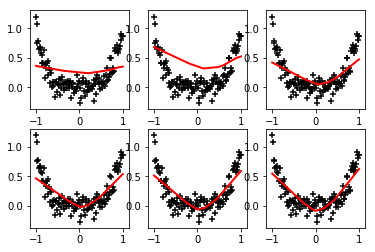

In [13]:
# SGD(随机梯度下降)优化， 学习率0.2
optimizer = optim.SGD(net.parameters(), lr=0.2)
loss_function = nn.MSELoss()

for epoch in xrange(100):
    y_pred = net(x)
    
    # 绘图
    if epoch % 20 == 0:
        plt.subplot(2,3,epoch/20+1)
        plt.scatter(x.data.numpy(),y.data.numpy(),color='black',marker='+')
        plt.plot(x.data.numpy(),y_pred.data.numpy(), color='red', lw=2)
        
        
    loss = loss_function(y_pred, y)
    
    # 更新参数
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = net(x)
plt.subplot(2,3,6)
plt.scatter(x.data.numpy(),y.data.numpy(),color='black',marker='+')
plt.plot(x.data.numpy(),y_pred.data.numpy(), color='red', lw=2)
plt.show()        